# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmprl0d9dxn


[d3graph] INFO> Writing /local/scratch/tmp/tmprl0d9dxn/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']

  0%|          | 0/27 [00:00<?, ?it/s]

  4%|▎         | 1/27 [00:02<01:09,  2.67s/it]

  7%|▋         | 2/27 [00:03<00:42,  1.68s/it]

 11%|█         | 3/27 [00:04<00:32,  1.37s/it]

 15%|█▍        | 4/27 [00:06<00:31,  1.37s/it]

 19%|█▊        | 5/27 [00:06<00:26,  1.22s/it]

 22%|██▏       | 6/27 [00:07<00:23,  1.10s/it]

 26%|██▌       | 7/27 [00:08<00:20,  1.02s/it]

 30%|██▉       | 8/27 [00:09<00:18,  1.04it/s]

 33%|███▎      | 9/27 [00:10<00:16,  1.08it/s]

 37%|███▋      | 10/27 [00:11<00:15,  1.12it/s]

 41%|████      | 11/27 [00:12<00:14,  1.14it/s]

 44%|████▍     | 12/27 [00:12<00:12,  1.15it/s]

 48%|████▊     | 13/27 [00:13<00:12,  1.16it/s]

 52%|█████▏    | 14/27 [00:14<00:11,  1.13it/s]

 56%|█████▌    | 15/27 [00:15<00:10,  1.09it/s]

 59%|█████▉    | 16/27 [00:16<00:10,  1.07it/s]

 63%|██████▎   | 17/27 [00:17<00:09,  1.05it/s]

 67%|██████▋   | 18/27 [00:18<00:08,  1.04it/s]

 70%|███████   | 19/27 [00:19<00:07,  1.04it/s]

 74%|███████▍  | 20/27 [00:20<00:06,  1.03it/s]

 78%|███████▊  | 21/27 [00:21<00:05,  1.03it/s]

 81%|████████▏ | 22/27 [00:22<00:04,  1.04it/s]

 85%|████████▌ | 23/27 [00:23<00:03,  1.04it/s]

 89%|████████▉ | 24/27 [00:24<00:02,  1.03it/s]

 93%|█████████▎| 25/27 [00:25<00:01,  1.02it/s]

 96%|█████████▋| 26/27 [00:26<00:00,  1.02it/s]

100%|██████████| 27/27 [00:27<00:00,  1.10it/s]

100%|██████████| 27/27 [00:27<00:00,  1.01s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


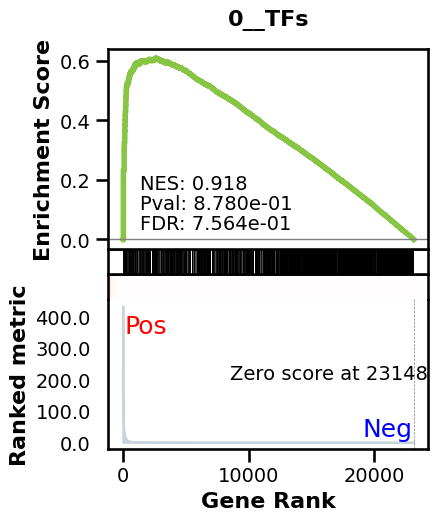

_________________________________________
TF specific enrichment


found some significant results for  64.28571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:31,  4.06it/s]

  2%|▏         | 2/128 [00:00<00:30,  4.20it/s]

  2%|▏         | 3/128 [00:00<00:29,  4.24it/s]

  3%|▎         | 4/128 [00:00<00:29,  4.24it/s]

  4%|▍         | 5/128 [00:01<00:28,  4.26it/s]

  5%|▍         | 6/128 [00:01<00:28,  4.27it/s]

  5%|▌         | 7/128 [00:01<00:28,  4.28it/s]

  6%|▋         | 8/128 [00:01<00:28,  4.28it/s]

  7%|▋         | 9/128 [00:02<00:27,  4.28it/s]

  8%|▊         | 10/128 [00:02<00:27,  4.28it/s]

  9%|▊         | 11/128 [00:02<00:27,  4.28it/s]

  9%|▉         | 12/128 [00:02<00:27,  4.28it/s]

 10%|█         | 13/128 [00:03<00:26,  4.28it/s]

 11%|█         | 14/128 [00:03<00:26,  4.29it/s]

 12%|█▏        | 15/128 [00:03<00:26,  4.29it/s]

 12%|█▎        | 16/128 [00:03<00:26,  4.29it/s]

 13%|█▎        | 17/128 [00:03<00:25,  4.29it/s]

 14%|█▍        | 18/128 [00:04<00:26,  4.17it/s]

 15%|█▍        | 19/128 [00:04<00:27,  3.91it/s]

 16%|█▌        | 20/128 [00:04<00:26,  4.02it/s]

 16%|█▋        | 21/128 [00:04<00:26,  4.11it/s]

 17%|█▋        | 22/128 [00:05<00:25,  4.18it/s]

 18%|█▊        | 23/128 [00:05<00:24,  4.23it/s]

 19%|█▉        | 24/128 [00:05<00:24,  4.26it/s]

 20%|█▉        | 25/128 [00:05<00:24,  4.29it/s]

 20%|██        | 26/128 [00:06<00:23,  4.30it/s]

 21%|██        | 27/128 [00:06<00:23,  4.31it/s]

 22%|██▏       | 28/128 [00:06<00:23,  4.32it/s]

 23%|██▎       | 29/128 [00:06<00:22,  4.32it/s]

 23%|██▎       | 30/128 [00:07<00:22,  4.33it/s]

 24%|██▍       | 31/128 [00:07<00:22,  4.34it/s]

 25%|██▌       | 32/128 [00:07<00:22,  4.34it/s]

 26%|██▌       | 33/128 [00:07<00:21,  4.33it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.34it/s]

 27%|██▋       | 35/128 [00:08<00:21,  4.34it/s]

 28%|██▊       | 36/128 [00:08<00:21,  4.31it/s]

 29%|██▉       | 37/128 [00:08<00:22,  4.09it/s]

 30%|██▉       | 38/128 [00:08<00:21,  4.16it/s]

 30%|███       | 39/128 [00:09<00:21,  4.22it/s]

 31%|███▏      | 40/128 [00:09<00:20,  4.26it/s]

 32%|███▏      | 41/128 [00:09<00:20,  4.29it/s]

 33%|███▎      | 42/128 [00:09<00:19,  4.31it/s]

 34%|███▎      | 43/128 [00:10<00:19,  4.32it/s]

 34%|███▍      | 44/128 [00:10<00:19,  4.32it/s]

 35%|███▌      | 45/128 [00:10<00:19,  4.33it/s]

 36%|███▌      | 46/128 [00:10<00:18,  4.33it/s]

 37%|███▋      | 47/128 [00:11<00:18,  4.33it/s]

 38%|███▊      | 48/128 [00:11<00:18,  4.34it/s]

 38%|███▊      | 49/128 [00:11<00:18,  4.34it/s]

 39%|███▉      | 50/128 [00:11<00:17,  4.34it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.34it/s]

 41%|████      | 52/128 [00:12<00:17,  4.34it/s]

 41%|████▏     | 53/128 [00:12<00:17,  4.35it/s]

 42%|████▏     | 54/128 [00:12<00:17,  4.35it/s]

 43%|████▎     | 55/128 [00:12<00:16,  4.33it/s]

 44%|████▍     | 56/128 [00:13<00:16,  4.33it/s]

 45%|████▍     | 57/128 [00:13<00:16,  4.34it/s]

 45%|████▌     | 58/128 [00:13<00:16,  4.33it/s]

 46%|████▌     | 59/128 [00:13<00:15,  4.34it/s]

 47%|████▋     | 60/128 [00:14<00:15,  4.34it/s]

 48%|████▊     | 61/128 [00:14<00:15,  4.35it/s]

 48%|████▊     | 62/128 [00:14<00:15,  4.35it/s]

 49%|████▉     | 63/128 [00:14<00:16,  4.01it/s]

 50%|█████     | 64/128 [00:15<00:15,  4.11it/s]

 51%|█████     | 65/128 [00:15<00:15,  4.17it/s]

 52%|█████▏    | 66/128 [00:15<00:14,  4.22it/s]

 52%|█████▏    | 67/128 [00:15<00:14,  4.26it/s]

 53%|█████▎    | 68/128 [00:15<00:14,  4.28it/s]

 54%|█████▍    | 69/128 [00:16<00:13,  4.30it/s]

 55%|█████▍    | 70/128 [00:16<00:13,  4.31it/s]

 55%|█████▌    | 71/128 [00:16<00:13,  4.33it/s]

 56%|█████▋    | 72/128 [00:16<00:12,  4.34it/s]

 57%|█████▋    | 73/128 [00:17<00:12,  4.34it/s]

 58%|█████▊    | 74/128 [00:17<00:12,  4.34it/s]

 59%|█████▊    | 75/128 [00:17<00:12,  4.34it/s]

 59%|█████▉    | 76/128 [00:17<00:11,  4.35it/s]

 60%|██████    | 77/128 [00:17<00:11,  4.34it/s]

 61%|██████    | 78/128 [00:18<00:11,  4.34it/s]

 62%|██████▏   | 79/128 [00:18<00:11,  4.35it/s]

 62%|██████▎   | 80/128 [00:18<00:11,  4.34it/s]

 63%|██████▎   | 81/128 [00:18<00:10,  4.35it/s]

 64%|██████▍   | 82/128 [00:19<00:10,  4.35it/s]

 65%|██████▍   | 83/128 [00:19<00:10,  4.35it/s]

 66%|██████▌   | 84/128 [00:19<00:10,  4.35it/s]

 66%|██████▋   | 85/128 [00:19<00:09,  4.34it/s]

 67%|██████▋   | 86/128 [00:20<00:09,  4.34it/s]

 68%|██████▊   | 87/128 [00:20<00:09,  4.34it/s]

 69%|██████▉   | 88/128 [00:20<00:09,  4.35it/s]

 70%|██████▉   | 89/128 [00:20<00:08,  4.35it/s]

 70%|███████   | 90/128 [00:20<00:08,  4.35it/s]

 71%|███████   | 91/128 [00:21<00:08,  4.35it/s]

 72%|███████▏  | 92/128 [00:21<00:08,  4.35it/s]

 73%|███████▎  | 93/128 [00:21<00:08,  4.35it/s]

 73%|███████▎  | 94/128 [00:21<00:07,  4.35it/s]

 74%|███████▍  | 95/128 [00:22<00:07,  4.35it/s]

 75%|███████▌  | 96/128 [00:22<00:07,  4.35it/s]

 76%|███████▌  | 97/128 [00:22<00:07,  4.35it/s]

 77%|███████▋  | 98/128 [00:22<00:06,  4.34it/s]

 77%|███████▋  | 99/128 [00:23<00:06,  4.34it/s]

 78%|███████▊  | 100/128 [00:23<00:06,  4.34it/s]

 79%|███████▉  | 101/128 [00:23<00:06,  4.34it/s]

 80%|███████▉  | 102/128 [00:23<00:05,  4.35it/s]

 80%|████████  | 103/128 [00:23<00:05,  4.35it/s]

 81%|████████▏ | 104/128 [00:24<00:05,  4.35it/s]

 82%|████████▏ | 105/128 [00:24<00:05,  4.34it/s]

 83%|████████▎ | 106/128 [00:24<00:05,  4.34it/s]

 84%|████████▎ | 107/128 [00:24<00:04,  4.34it/s]

 84%|████████▍ | 108/128 [00:25<00:04,  4.34it/s]

 85%|████████▌ | 109/128 [00:25<00:04,  4.34it/s]

 86%|████████▌ | 110/128 [00:25<00:04,  4.20it/s]

 87%|████████▋ | 111/128 [00:25<00:04,  3.89it/s]

 88%|████████▊ | 112/128 [00:26<00:04,  3.70it/s]

 88%|████████▊ | 113/128 [00:26<00:04,  3.58it/s]

 89%|████████▉ | 114/128 [00:26<00:04,  3.50it/s]

 90%|████████▉ | 115/128 [00:27<00:03,  3.45it/s]

 91%|█████████ | 116/128 [00:27<00:03,  3.41it/s]

 91%|█████████▏| 117/128 [00:27<00:03,  3.39it/s]

 92%|█████████▏| 118/128 [00:28<00:02,  3.37it/s]

 93%|█████████▎| 119/128 [00:28<00:02,  3.35it/s]

 94%|█████████▍| 120/128 [00:28<00:02,  3.55it/s]

 95%|█████████▍| 121/128 [00:28<00:01,  3.72it/s]

 95%|█████████▌| 122/128 [00:29<00:01,  3.85it/s]

 96%|█████████▌| 123/128 [00:29<00:01,  3.96it/s]

 97%|█████████▋| 124/128 [00:29<00:00,  4.03it/s]

 98%|█████████▊| 125/128 [00:29<00:00,  4.08it/s]

 98%|█████████▊| 126/128 [00:29<00:00,  4.12it/s]

 99%|█████████▉| 127/128 [00:30<00:00,  4.15it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:30<00:00,  4.14it/s]

100%|██████████| 128/128 [00:30<00:00,  4.20it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001009937931564434


EPR: 1.8352008526185457


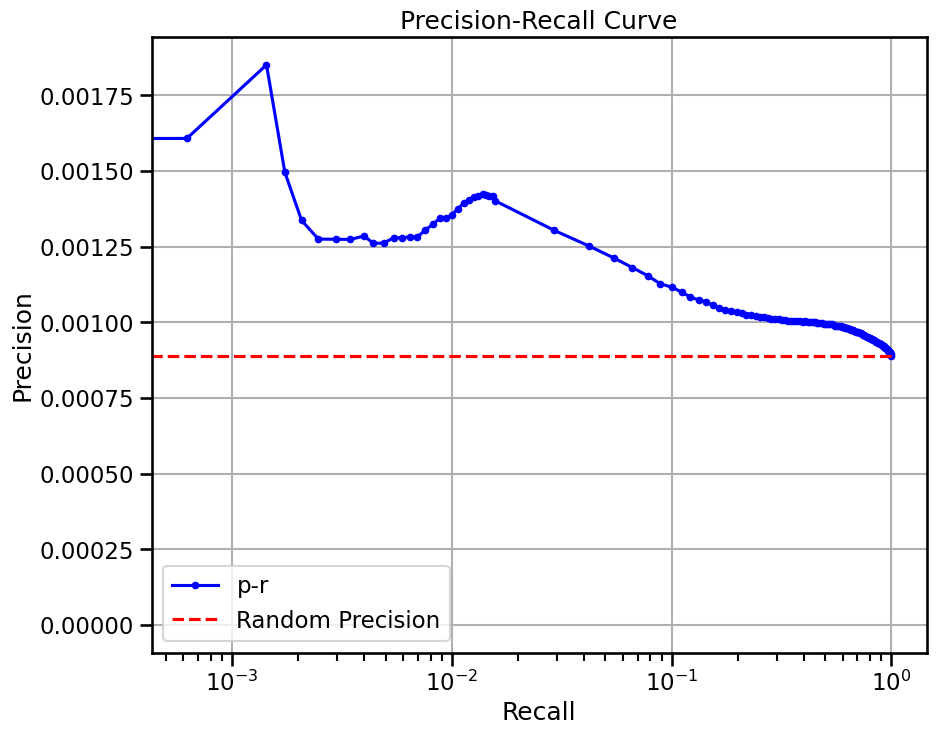

  0%|          | 0/54 [00:00<?, ?it/s]

  2%|▏         | 1/54 [00:02<01:54,  2.16s/it]

  4%|▎         | 2/54 [00:03<01:24,  1.63s/it]

  6%|▌         | 3/54 [00:04<01:14,  1.45s/it]

  7%|▋         | 4/54 [00:05<01:08,  1.38s/it]

  9%|▉         | 5/54 [00:07<01:05,  1.33s/it]

 11%|█         | 6/54 [00:08<01:02,  1.31s/it]

 13%|█▎        | 7/54 [00:09<01:01,  1.31s/it]

 15%|█▍        | 8/54 [00:11<00:59,  1.30s/it]

 17%|█▋        | 9/54 [00:12<00:57,  1.28s/it]

 19%|█▊        | 10/54 [00:13<00:55,  1.27s/it]

 20%|██        | 11/54 [00:14<00:54,  1.26s/it]

 22%|██▏       | 12/54 [00:15<00:51,  1.23s/it]

 24%|██▍       | 13/54 [00:17<00:49,  1.21s/it]

 26%|██▌       | 14/54 [00:18<00:47,  1.18s/it]

 28%|██▊       | 15/54 [00:19<00:45,  1.16s/it]

 30%|██▉       | 16/54 [00:20<00:43,  1.15s/it]

 31%|███▏      | 17/54 [00:21<00:42,  1.14s/it]

 33%|███▎      | 18/54 [00:22<00:41,  1.14s/it]

 35%|███▌      | 19/54 [00:23<00:39,  1.14s/it]

 37%|███▋      | 20/54 [00:24<00:39,  1.15s/it]

 39%|███▉      | 21/54 [00:26<00:40,  1.23s/it]

 41%|████      | 22/54 [00:27<00:40,  1.27s/it]

 43%|████▎     | 23/54 [00:29<00:39,  1.29s/it]

 44%|████▍     | 24/54 [00:30<00:38,  1.30s/it]

 46%|████▋     | 25/54 [00:31<00:38,  1.32s/it]

 48%|████▊     | 26/54 [00:33<00:37,  1.33s/it]

 50%|█████     | 27/54 [00:34<00:35,  1.33s/it]

 52%|█████▏    | 28/54 [00:35<00:34,  1.33s/it]

 54%|█████▎    | 29/54 [00:37<00:33,  1.32s/it]

 56%|█████▌    | 30/54 [00:38<00:31,  1.32s/it]

 57%|█████▋    | 31/54 [00:39<00:30,  1.34s/it]

 59%|█████▉    | 32/54 [00:41<00:29,  1.34s/it]

 61%|██████    | 33/54 [00:42<00:28,  1.35s/it]

 63%|██████▎   | 34/54 [00:43<00:27,  1.36s/it]

 65%|██████▍   | 35/54 [00:45<00:25,  1.35s/it]

 67%|██████▋   | 36/54 [00:46<00:24,  1.35s/it]

 69%|██████▊   | 37/54 [00:47<00:22,  1.35s/it]

 70%|███████   | 38/54 [00:49<00:21,  1.35s/it]

 72%|███████▏  | 39/54 [00:50<00:20,  1.34s/it]

 74%|███████▍  | 40/54 [00:51<00:18,  1.34s/it]

 76%|███████▌  | 41/54 [00:53<00:17,  1.34s/it]

 78%|███████▊  | 42/54 [00:54<00:16,  1.36s/it]

 80%|███████▉  | 43/54 [00:56<00:15,  1.37s/it]

 81%|████████▏ | 44/54 [00:57<00:13,  1.37s/it]

 83%|████████▎ | 45/54 [00:58<00:12,  1.37s/it]

 85%|████████▌ | 46/54 [01:00<00:11,  1.38s/it]

 87%|████████▋ | 47/54 [01:01<00:09,  1.37s/it]

 89%|████████▉ | 48/54 [01:02<00:08,  1.37s/it]

 91%|█████████ | 49/54 [01:04<00:06,  1.36s/it]

 93%|█████████▎| 50/54 [01:05<00:05,  1.35s/it]

 94%|█████████▍| 51/54 [01:06<00:04,  1.35s/it]

 96%|█████████▋| 52/54 [01:08<00:02,  1.34s/it]

 98%|█████████▊| 53/54 [01:09<00:01,  1.34s/it]

100%|██████████| 54/54 [01:10<00:00,  1.14s/it]

100%|██████████| 54/54 [01:10<00:00,  1.31s/it]

base enrichment


Top central genes: []


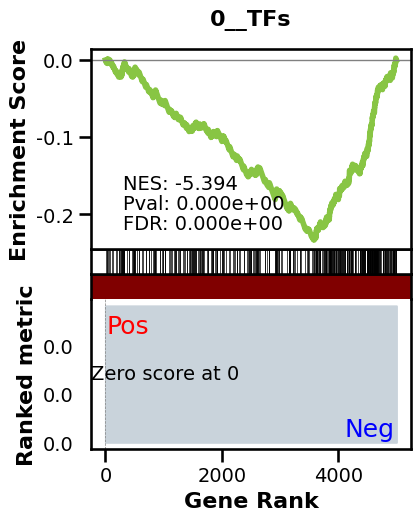

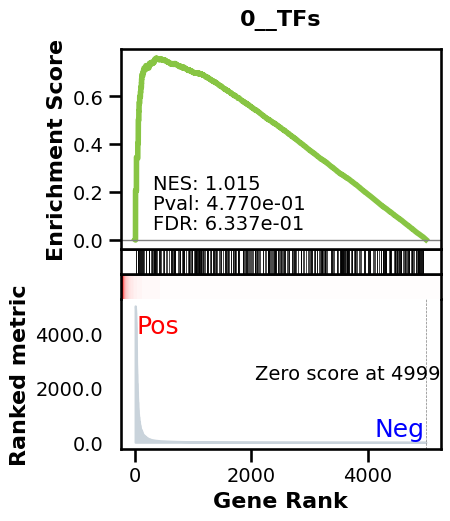

_________________________________________
TF specific enrichment


found some significant results for  14.705882352941176 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.52it/s]

 11%|█         | 14/128 [00:00<00:01, 60.22it/s]

 16%|█▋        | 21/128 [00:00<00:01, 59.85it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.04it/s]

 27%|██▋       | 35/128 [00:00<00:01, 59.97it/s]

 32%|███▏      | 41/128 [00:00<00:01, 59.84it/s]

 38%|███▊      | 48/128 [00:00<00:01, 60.00it/s]

 42%|████▏     | 54/128 [00:00<00:01, 59.99it/s]

 47%|████▋     | 60/128 [00:01<00:01, 59.92it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 59.82it/s]

 57%|█████▋    | 73/128 [00:01<00:00, 60.01it/s]

 62%|██████▏   | 79/128 [00:01<00:00, 59.98it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 59.90it/s]

 71%|███████   | 91/128 [00:01<00:00, 59.92it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.09it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.08it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.01it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.14it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.03it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.97it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008765866577707097


EPR: 2.7836056684301527


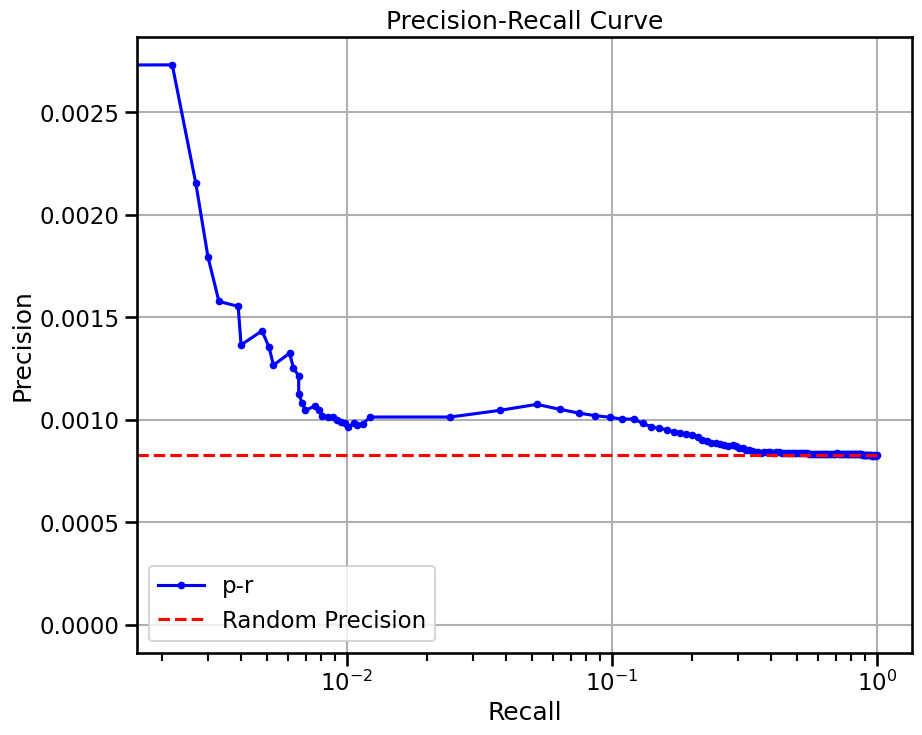

base enrichment


Top central genes: []


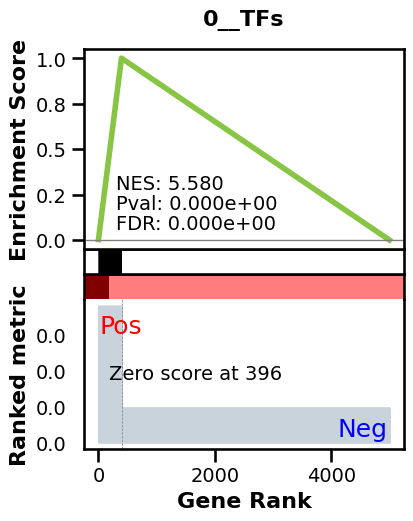

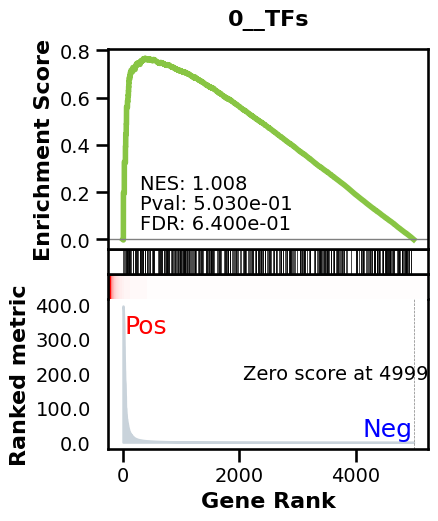

_________________________________________
TF specific enrichment


found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.99it/s]

 11%|█         | 14/128 [00:00<00:01, 60.99it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.98it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.99it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.00it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.04it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.04it/s]

 44%|████▍     | 56/128 [00:00<00:01, 61.05it/s]

 49%|████▉     | 63/128 [00:01<00:01, 61.01it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 61.04it/s]

 60%|██████    | 77/128 [00:01<00:00, 61.02it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 61.04it/s]

 71%|███████   | 91/128 [00:01<00:00, 61.05it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 61.02it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.94it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.95it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.96it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.96it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.96it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016408226284757045
EPR: 4.246105316851987


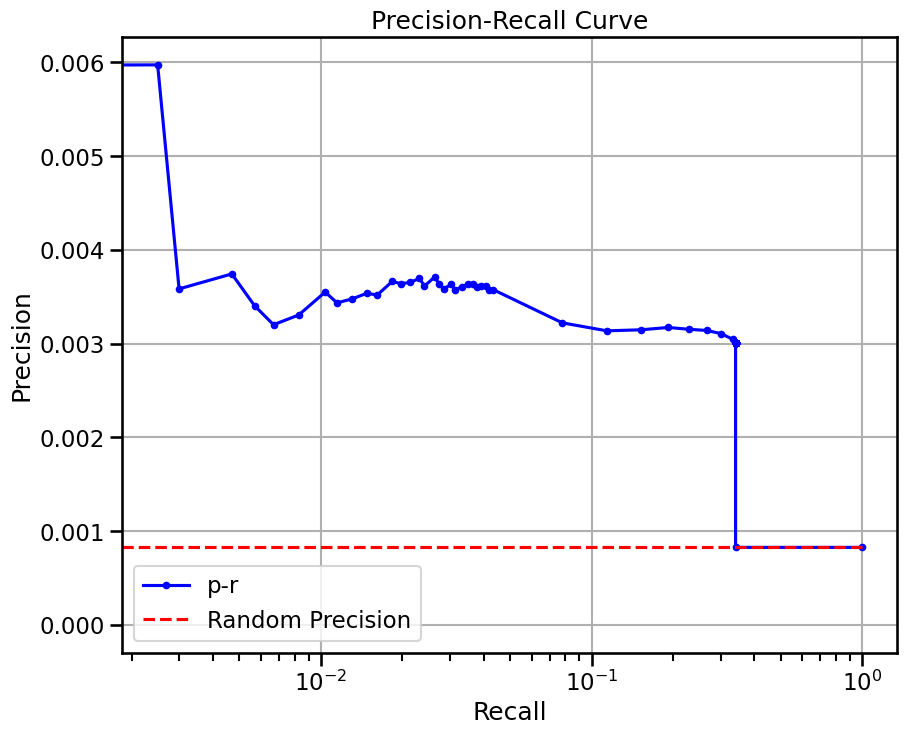

true elem 10028 ...


doing classification....


metrics {'used_heads': 3, 'precision': 0.0008314620117426245, 'random_precision': 0.0008314620117426245, 'recall': 1.0, 'predicted_true': 4855303.0, 'number_of_true': 4037.0}


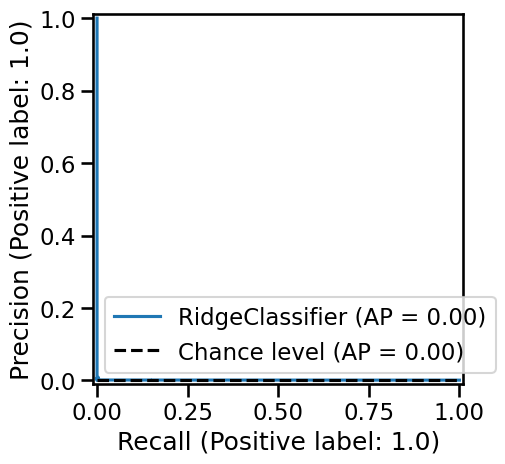

base enrichment


Top central genes: []


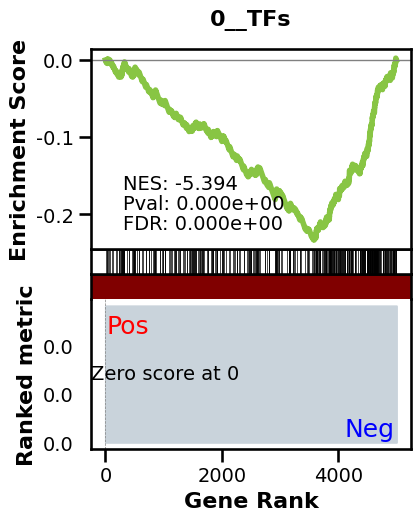

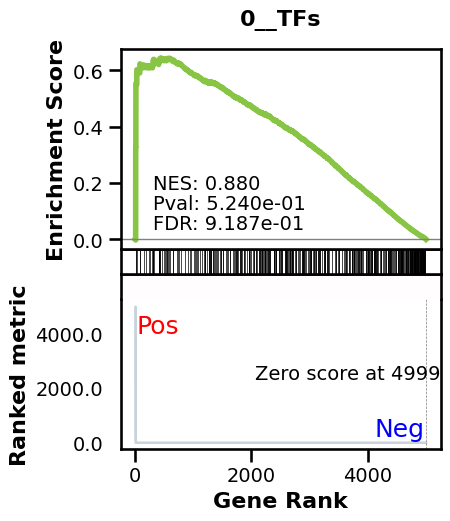

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.88it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.98it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.16it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.16it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.20it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.28it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.27it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.24it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.27it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.29it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.25it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.27it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.27it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.28it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.22it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.18it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.24it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.24it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.28it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.22it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.14it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009938231033779985
EPR: 4.979989927628857


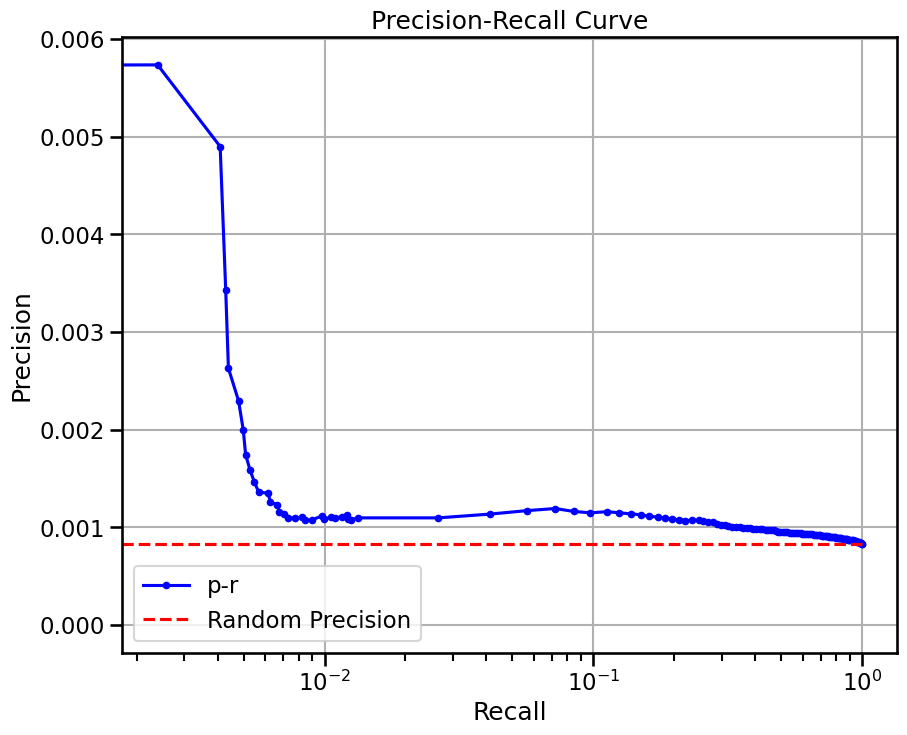

base enrichment


Top central genes: []


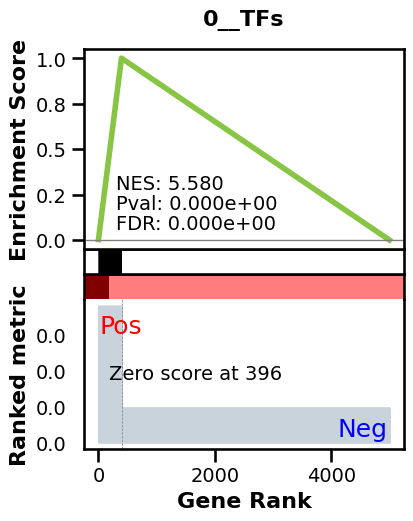

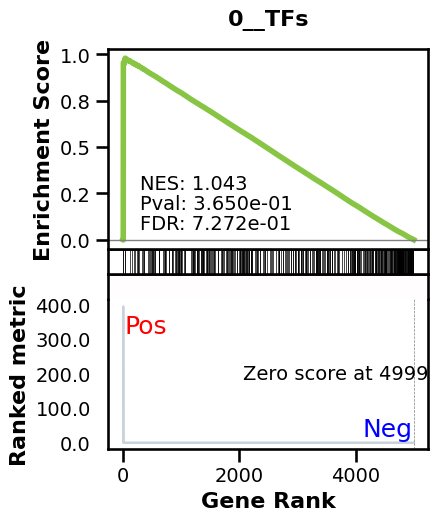

_________________________________________
TF specific enrichment


found some significant results for  8.823529411764707 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0030067336747127975 
recall:  0.3405464698843239 
random precision: 0.0008263855307705822


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.81it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.95it/s]

 14%|█▍        | 18/128 [00:00<00:01, 59.01it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.00it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.03it/s]

 28%|██▊       | 36/128 [00:00<00:01, 59.07it/s]

 33%|███▎      | 42/128 [00:00<00:01, 59.02it/s]

 38%|███▊      | 48/128 [00:00<00:01, 59.04it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.97it/s]

 47%|████▋     | 60/128 [00:01<00:01, 59.04it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 59.02it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 59.06it/s]

 61%|██████    | 78/128 [00:01<00:00, 59.11it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 59.11it/s]

 70%|███████   | 90/128 [00:01<00:00, 59.09it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 59.11it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 59.10it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 59.08it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 59.10it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 59.15it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 59.13it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.03it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0022271414101937915
EPR: 12.416585640502555


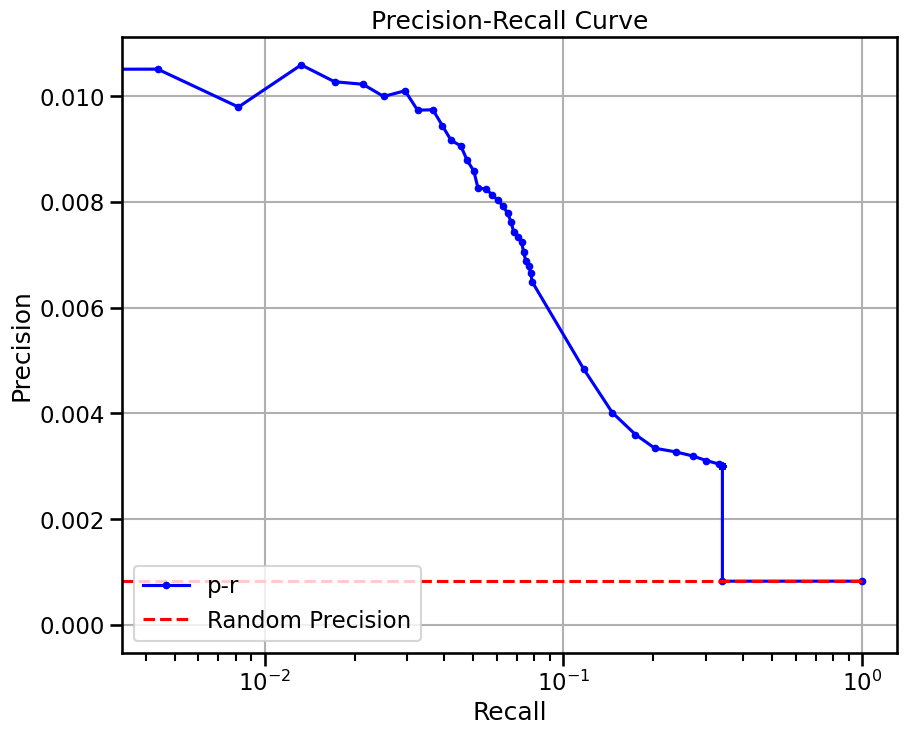

  0%|          | 0/9 [00:00<?, ?it/s]

 11%|█         | 1/9 [00:02<00:17,  2.17s/it]

 22%|██▏       | 2/9 [00:03<00:10,  1.48s/it]

 33%|███▎      | 3/9 [00:04<00:07,  1.24s/it]

 44%|████▍     | 4/9 [00:05<00:05,  1.14s/it]

 56%|█████▌    | 5/9 [00:06<00:04,  1.08s/it]

 67%|██████▋   | 6/9 [00:07<00:03,  1.05s/it]

 78%|███████▊  | 7/9 [00:08<00:02,  1.03s/it]

 89%|████████▉ | 8/9 [00:09<00:01,  1.01s/it]

100%|██████████| 9/9 [00:09<00:00,  1.36it/s]

100%|██████████| 9/9 [00:09<00:00,  1.04s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


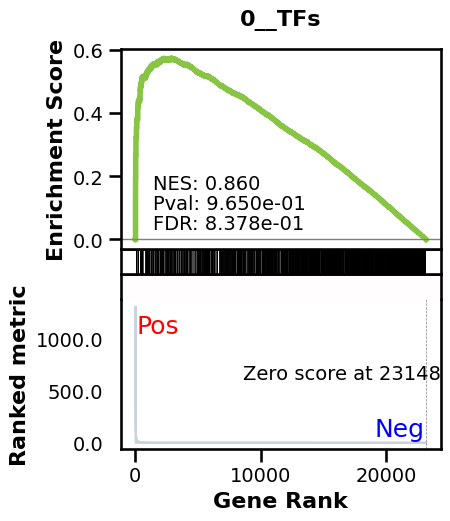

_________________________________________
TF specific enrichment


found some significant results for  65.17857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:29,  4.26it/s]

  2%|▏         | 2/128 [00:00<00:29,  4.27it/s]

  2%|▏         | 3/128 [00:00<00:29,  4.27it/s]

  3%|▎         | 4/128 [00:00<00:29,  4.25it/s]

  4%|▍         | 5/128 [00:01<00:28,  4.26it/s]

  5%|▍         | 6/128 [00:01<00:28,  4.26it/s]

  5%|▌         | 7/128 [00:01<00:28,  4.27it/s]

  6%|▋         | 8/128 [00:01<00:28,  4.27it/s]

  7%|▋         | 9/128 [00:02<00:27,  4.27it/s]

  8%|▊         | 10/128 [00:02<00:27,  4.27it/s]

  9%|▊         | 11/128 [00:02<00:27,  4.27it/s]

  9%|▉         | 12/128 [00:02<00:27,  4.28it/s]

 10%|█         | 13/128 [00:03<00:26,  4.28it/s]

 11%|█         | 14/128 [00:03<00:26,  4.28it/s]

 12%|█▏        | 15/128 [00:03<00:26,  4.27it/s]

 12%|█▎        | 16/128 [00:03<00:26,  4.28it/s]

 13%|█▎        | 17/128 [00:03<00:26,  4.24it/s]

 14%|█▍        | 18/128 [00:04<00:25,  4.25it/s]

 15%|█▍        | 19/128 [00:04<00:25,  4.26it/s]

 16%|█▌        | 20/128 [00:04<00:25,  4.27it/s]

 16%|█▋        | 21/128 [00:04<00:25,  4.27it/s]

 17%|█▋        | 22/128 [00:05<00:24,  4.26it/s]

 18%|█▊        | 23/128 [00:05<00:24,  4.27it/s]

 19%|█▉        | 24/128 [00:05<00:24,  4.28it/s]

 20%|█▉        | 25/128 [00:05<00:24,  4.28it/s]

 20%|██        | 26/128 [00:06<00:23,  4.28it/s]

 21%|██        | 27/128 [00:06<00:23,  4.28it/s]

 22%|██▏       | 28/128 [00:06<00:23,  4.26it/s]

 23%|██▎       | 29/128 [00:06<00:23,  4.27it/s]

 23%|██▎       | 30/128 [00:07<00:22,  4.27it/s]

 24%|██▍       | 31/128 [00:07<00:22,  4.27it/s]

 25%|██▌       | 32/128 [00:07<00:22,  4.26it/s]

 26%|██▌       | 33/128 [00:07<00:22,  4.28it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.29it/s]

 27%|██▋       | 35/128 [00:08<00:21,  4.29it/s]

 28%|██▊       | 36/128 [00:08<00:21,  4.28it/s]

 29%|██▉       | 37/128 [00:08<00:21,  4.26it/s]

 30%|██▉       | 38/128 [00:08<00:21,  4.27it/s]

 30%|███       | 39/128 [00:09<00:21,  4.24it/s]

 31%|███▏      | 40/128 [00:09<00:20,  4.25it/s]

 32%|███▏      | 41/128 [00:09<00:20,  4.26it/s]

 33%|███▎      | 42/128 [00:09<00:20,  4.27it/s]

 34%|███▎      | 43/128 [00:10<00:20,  4.25it/s]

 34%|███▍      | 44/128 [00:10<00:19,  4.25it/s]

 35%|███▌      | 45/128 [00:10<00:19,  4.26it/s]

 36%|███▌      | 46/128 [00:10<00:19,  4.26it/s]

 37%|███▋      | 47/128 [00:11<00:18,  4.28it/s]

 38%|███▊      | 48/128 [00:11<00:18,  4.29it/s]

 38%|███▊      | 49/128 [00:11<00:18,  4.29it/s]

 39%|███▉      | 50/128 [00:11<00:18,  4.27it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.28it/s]

 41%|████      | 52/128 [00:12<00:17,  4.27it/s]

 41%|████▏     | 53/128 [00:12<00:17,  4.28it/s]

 42%|████▏     | 54/128 [00:12<00:17,  4.28it/s]

 43%|████▎     | 55/128 [00:12<00:17,  4.29it/s]

 44%|████▍     | 56/128 [00:13<00:16,  4.29it/s]

 45%|████▍     | 57/128 [00:13<00:16,  4.29it/s]

 45%|████▌     | 58/128 [00:13<00:16,  4.29it/s]

 46%|████▌     | 59/128 [00:13<00:16,  4.29it/s]

 47%|████▋     | 60/128 [00:14<00:15,  4.29it/s]

 48%|████▊     | 61/128 [00:14<00:15,  4.25it/s]

 48%|████▊     | 62/128 [00:14<00:15,  4.26it/s]

 49%|████▉     | 63/128 [00:14<00:15,  4.26it/s]

 50%|█████     | 64/128 [00:14<00:14,  4.27it/s]

 51%|█████     | 65/128 [00:15<00:14,  4.22it/s]

 52%|█████▏    | 66/128 [00:15<00:14,  4.21it/s]

 52%|█████▏    | 67/128 [00:15<00:14,  4.23it/s]

 53%|█████▎    | 68/128 [00:15<00:14,  4.25it/s]

 54%|█████▍    | 69/128 [00:16<00:13,  4.25it/s]

 55%|█████▍    | 70/128 [00:16<00:13,  4.16it/s]

 55%|█████▌    | 71/128 [00:16<00:14,  4.05it/s]

 56%|█████▋    | 72/128 [00:16<00:13,  4.12it/s]

 57%|█████▋    | 73/128 [00:17<00:13,  4.16it/s]

 58%|█████▊    | 74/128 [00:17<00:12,  4.20it/s]

 59%|█████▊    | 75/128 [00:17<00:12,  4.22it/s]

 59%|█████▉    | 76/128 [00:17<00:12,  4.22it/s]

 60%|██████    | 77/128 [00:18<00:12,  4.23it/s]

 61%|██████    | 78/128 [00:18<00:11,  4.25it/s]

 62%|██████▏   | 79/128 [00:18<00:11,  4.24it/s]

 62%|██████▎   | 80/128 [00:18<00:11,  4.25it/s]

 63%|██████▎   | 81/128 [00:19<00:11,  4.26it/s]

 64%|██████▍   | 82/128 [00:19<00:10,  4.26it/s]

 65%|██████▍   | 83/128 [00:19<00:10,  4.25it/s]

 66%|██████▌   | 84/128 [00:19<00:10,  4.26it/s]

 66%|██████▋   | 85/128 [00:19<00:10,  4.25it/s]

 67%|██████▋   | 86/128 [00:20<00:09,  4.26it/s]

 68%|██████▊   | 87/128 [00:20<00:09,  4.27it/s]

 69%|██████▉   | 88/128 [00:20<00:09,  4.28it/s]

 70%|██████▉   | 89/128 [00:20<00:09,  4.26it/s]

 70%|███████   | 90/128 [00:21<00:08,  4.27it/s]

 71%|███████   | 91/128 [00:21<00:08,  4.27it/s]

 72%|███████▏  | 92/128 [00:21<00:08,  4.28it/s]

 73%|███████▎  | 93/128 [00:21<00:08,  4.28it/s]

 73%|███████▎  | 94/128 [00:22<00:07,  4.29it/s]

 74%|███████▍  | 95/128 [00:22<00:07,  4.29it/s]

 75%|███████▌  | 96/128 [00:22<00:07,  4.29it/s]

 76%|███████▌  | 97/128 [00:22<00:07,  4.30it/s]

 77%|███████▋  | 98/128 [00:23<00:06,  4.29it/s]

 77%|███████▋  | 99/128 [00:23<00:06,  4.29it/s]

 78%|███████▊  | 100/128 [00:23<00:06,  4.28it/s]

 79%|███████▉  | 101/128 [00:23<00:06,  4.28it/s]

 80%|███████▉  | 102/128 [00:23<00:06,  4.29it/s]

 80%|████████  | 103/128 [00:24<00:05,  4.28it/s]

 81%|████████▏ | 104/128 [00:24<00:05,  4.29it/s]

 82%|████████▏ | 105/128 [00:24<00:05,  4.29it/s]

 83%|████████▎ | 106/128 [00:24<00:05,  4.29it/s]

 84%|████████▎ | 107/128 [00:25<00:04,  4.27it/s]

 84%|████████▍ | 108/128 [00:25<00:04,  4.28it/s]

 85%|████████▌ | 109/128 [00:25<00:04,  4.25it/s]

 86%|████████▌ | 110/128 [00:25<00:04,  4.26it/s]

 87%|████████▋ | 111/128 [00:26<00:03,  4.25it/s]

 88%|████████▊ | 112/128 [00:26<00:03,  4.25it/s]

 88%|████████▊ | 113/128 [00:26<00:03,  4.25it/s]

 89%|████████▉ | 114/128 [00:26<00:03,  4.26it/s]

 90%|████████▉ | 115/128 [00:26<00:03,  4.27it/s]

 91%|█████████ | 116/128 [00:27<00:02,  4.27it/s]

 91%|█████████▏| 117/128 [00:27<00:02,  4.27it/s]

 92%|█████████▏| 118/128 [00:27<00:02,  4.27it/s]

 93%|█████████▎| 119/128 [00:27<00:02,  4.27it/s]

 94%|█████████▍| 120/128 [00:28<00:01,  4.27it/s]

 95%|█████████▍| 121/128 [00:28<00:01,  4.27it/s]

 95%|█████████▌| 122/128 [00:28<00:01,  4.27it/s]

 96%|█████████▌| 123/128 [00:28<00:01,  4.28it/s]

 97%|█████████▋| 124/128 [00:29<00:00,  4.27it/s]

 98%|█████████▊| 125/128 [00:29<00:00,  4.28it/s]

 98%|█████████▊| 126/128 [00:29<00:00,  4.28it/s]

 99%|█████████▉| 127/128 [00:29<00:00,  4.28it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:30<00:00,  4.26it/s]

100%|██████████| 128/128 [00:30<00:00,  4.26it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010149907452682893


EPR: 1.712481072658193


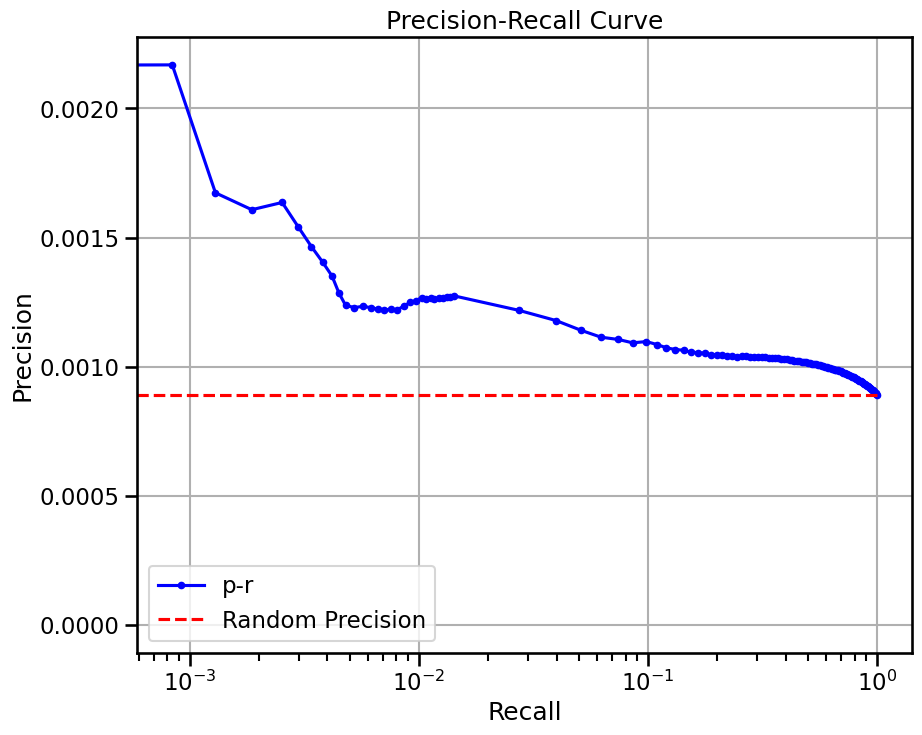

  0%|          | 0/17 [00:00<?, ?it/s]

  6%|▌         | 1/17 [00:02<00:41,  2.57s/it]

 12%|█▏        | 2/17 [00:04<00:28,  1.92s/it]

 18%|█▊        | 3/17 [00:05<00:23,  1.67s/it]

 24%|██▎       | 4/17 [00:06<00:20,  1.56s/it]

 29%|██▉       | 5/17 [00:08<00:17,  1.49s/it]

 35%|███▌      | 6/17 [00:09<00:15,  1.45s/it]

 41%|████      | 7/17 [00:10<00:14,  1.42s/it]

 47%|████▋     | 8/17 [00:12<00:12,  1.39s/it]

 53%|█████▎    | 9/17 [00:13<00:10,  1.37s/it]

 59%|█████▉    | 10/17 [00:14<00:09,  1.36s/it]

 65%|██████▍   | 11/17 [00:16<00:08,  1.35s/it]

 71%|███████   | 12/17 [00:17<00:06,  1.34s/it]

 76%|███████▋  | 13/17 [00:18<00:05,  1.33s/it]

 82%|████████▏ | 14/17 [00:20<00:03,  1.33s/it]

 88%|████████▊ | 15/17 [00:21<00:02,  1.33s/it]

 94%|█████████▍| 16/17 [00:22<00:01,  1.33s/it]

100%|██████████| 17/17 [00:23<00:00,  1.03s/it]

100%|██████████| 17/17 [00:23<00:00,  1.37s/it]

base enrichment


Top central genes: []


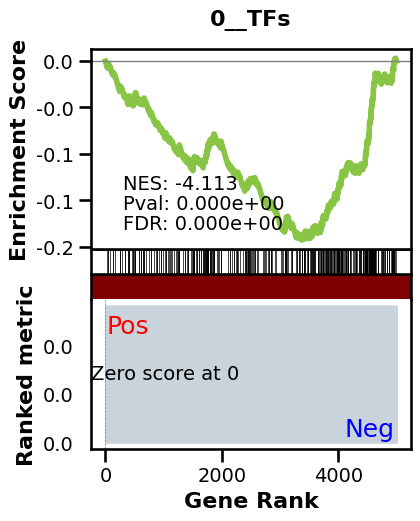

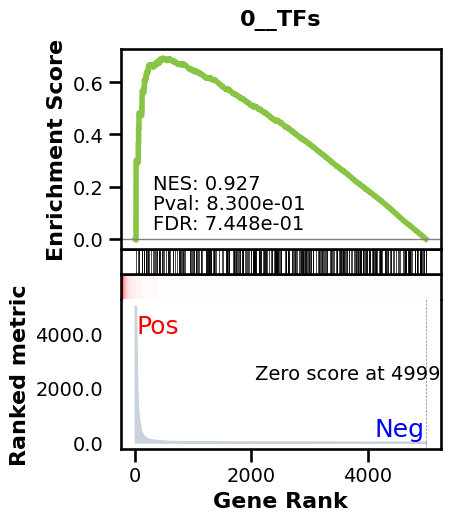

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.16it/s]

 11%|█         | 14/128 [00:00<00:01, 60.22it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.20it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.17it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.24it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.29it/s]

 38%|███▊      | 49/128 [00:00<00:01, 59.90it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.00it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.06it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.11it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.10it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.10it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.15it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.16it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.18it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.14it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.19it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


 98%|█████████▊| 126/128 [00:02<00:00, 60.13it/s]

100%|██████████| 128/128 [00:02<00:00, 60.11it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008891875675074028
EPR: 2.462294801818014


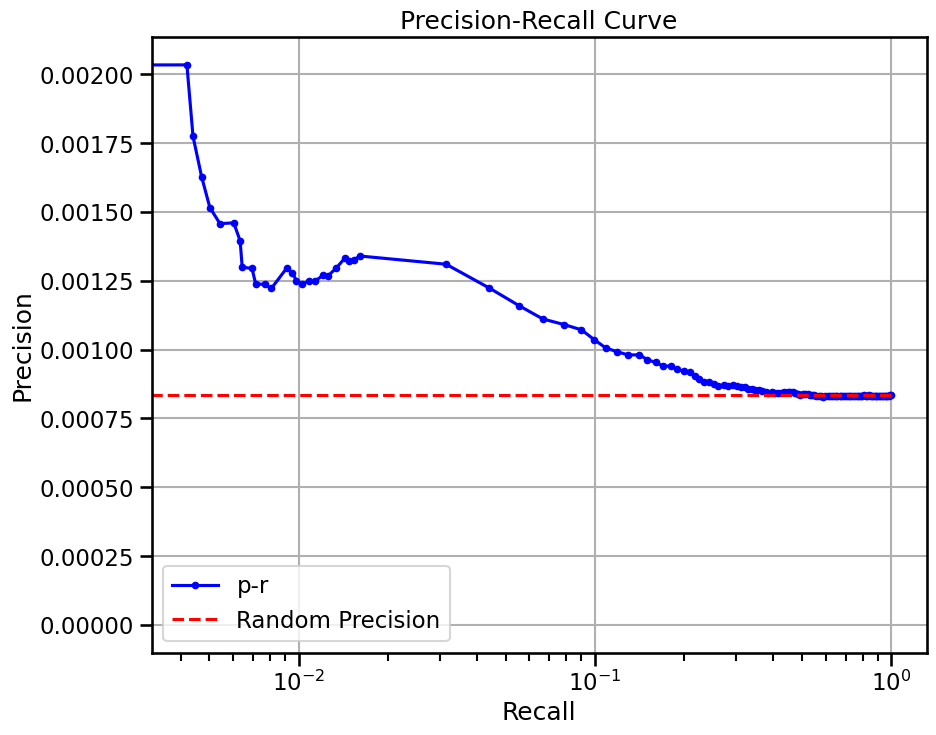

base enrichment


Top central genes: []


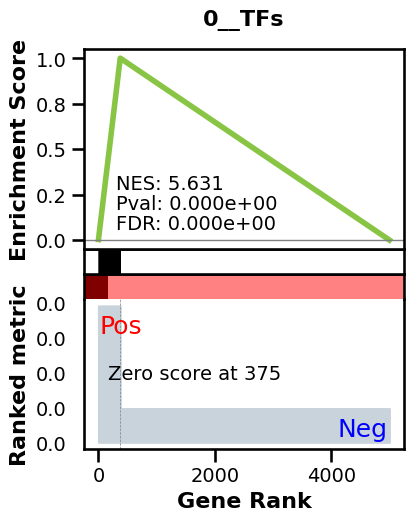

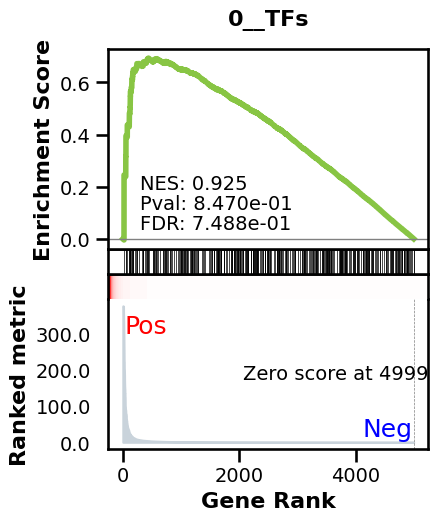

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.004295594991542786 
recall:  0.4727626459143969 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.70it/s]

 11%|█         | 14/128 [00:00<00:01, 60.46it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.24it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.32it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.43it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.41it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.45it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.44it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.22it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.30it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.39it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.46it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.48it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.44it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.45it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.39it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.40it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.37it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0026469619382611747
EPR: 10.225144640870424


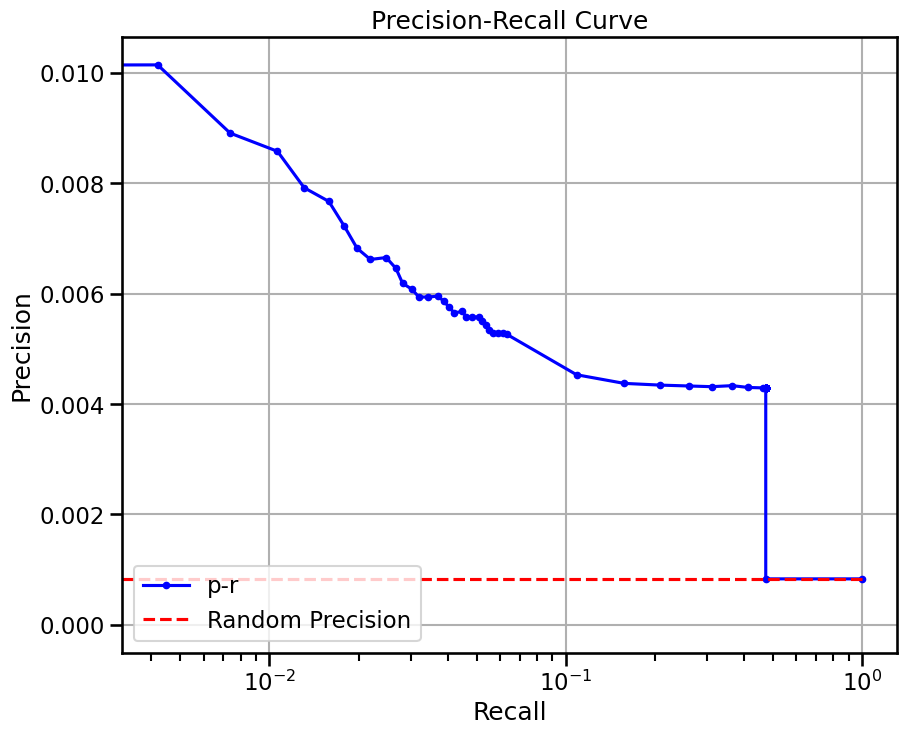

base enrichment


Top central genes: []


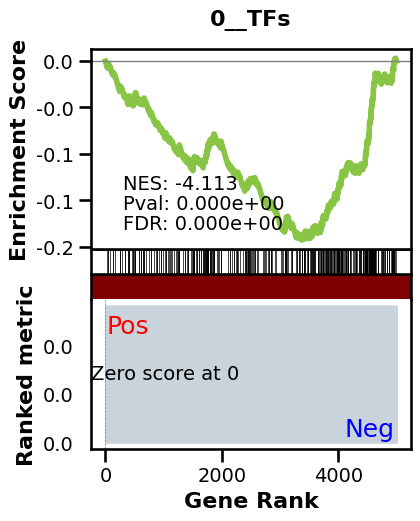

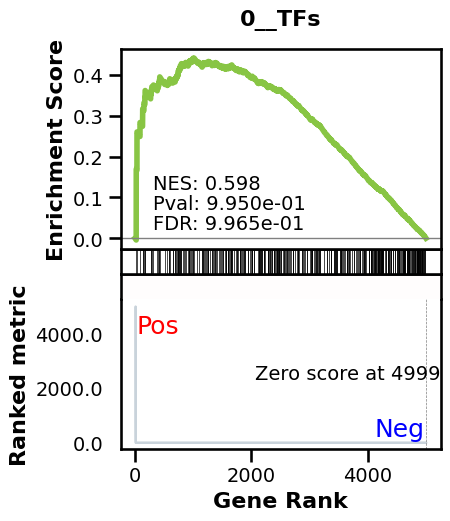

_________________________________________
TF specific enrichment


found some significant results for  7.6923076923076925 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.16it/s]

 11%|█         | 14/128 [00:00<00:01, 60.23it/s]

 16%|█▋        | 21/128 [00:00<00:01, 59.99it/s]

 21%|██        | 27/128 [00:00<00:01, 59.88it/s]

 26%|██▌       | 33/128 [00:00<00:01, 59.76it/s]

 31%|███▏      | 40/128 [00:00<00:01, 59.88it/s]

 37%|███▋      | 47/128 [00:00<00:01, 60.00it/s]

 41%|████▏     | 53/128 [00:00<00:01, 59.69it/s]

 46%|████▌     | 59/128 [00:00<00:01, 59.65it/s]

 51%|█████     | 65/128 [00:01<00:01, 59.75it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 59.87it/s]

 61%|██████    | 78/128 [00:01<00:00, 59.45it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 59.52it/s]

 70%|███████   | 90/128 [00:01<00:00, 59.32it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 59.45it/s]

 80%|████████  | 103/128 [00:01<00:00, 59.66it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 59.68it/s]

 91%|█████████ | 116/128 [00:01<00:00, 60.12it/s]

 96%|█████████▌| 123/128 [00:02<00:00, 60.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.88it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0009587904720622541
EPR: 5.319019774843278


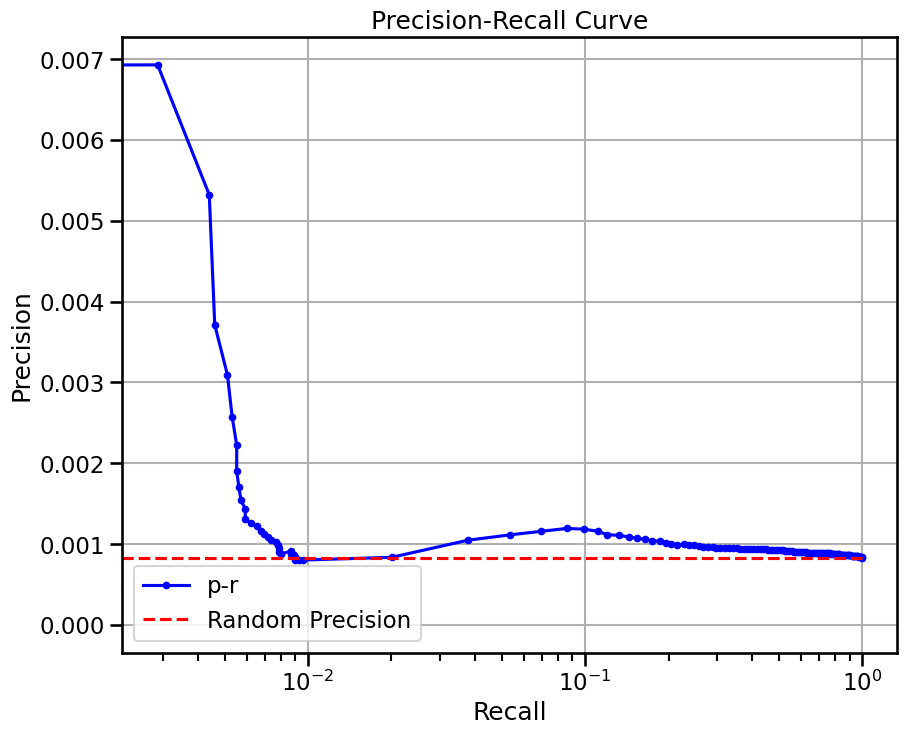

base enrichment


Top central genes: []


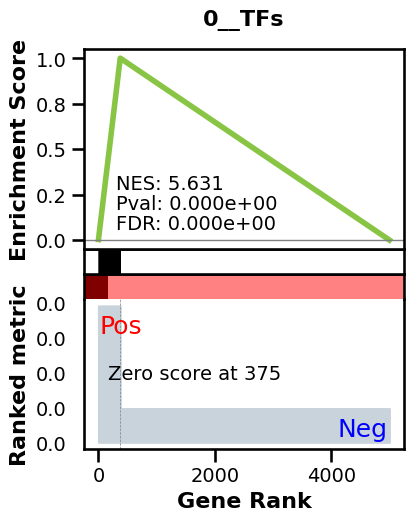

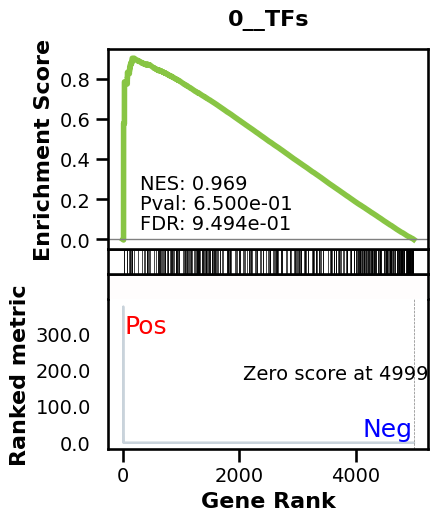

_________________________________________
TF specific enrichment


found some significant results for  3.8461538461538463 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.004295594991542786 
recall:  0.4727626459143969 
random precision: 0.0008337384212719915


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.34it/s]

 11%|█         | 14/128 [00:00<00:01, 60.34it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.38it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.37it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.38it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.37it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.40it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.37it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.32it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.30it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.34it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.39it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.34it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.35it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.34it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.35it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.34it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:756: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.32it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0034977306677940086
EPR: 18.57911694960466


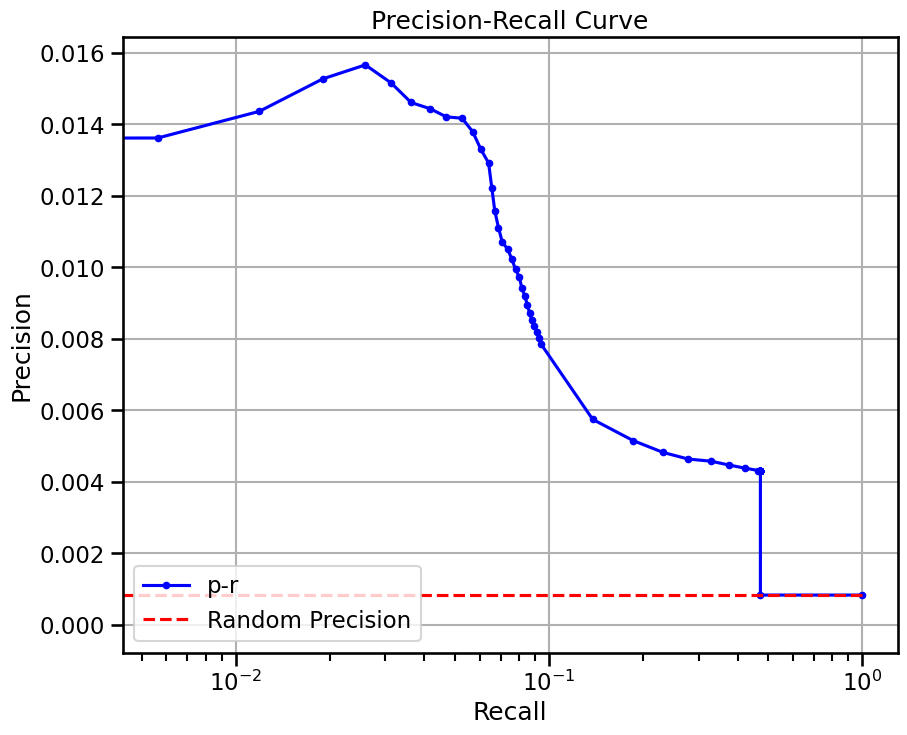

  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [00:02<00:21,  2.17s/it]

 18%|█▊        | 2/11 [00:03<00:12,  1.39s/it]

 27%|██▋       | 3/11 [00:03<00:09,  1.14s/it]

 36%|███▋      | 4/11 [00:04<00:07,  1.02s/it]

 45%|████▌     | 5/11 [00:05<00:05,  1.05it/s]

 55%|█████▍    | 6/11 [00:06<00:04,  1.09it/s]

 64%|██████▎   | 7/11 [00:07<00:03,  1.12it/s]

 73%|███████▎  | 8/11 [00:08<00:02,  1.14it/s]

 82%|████████▏ | 9/11 [00:08<00:01,  1.15it/s]

 91%|█████████ | 10/11 [00:09<00:00,  1.16it/s]

100%|██████████| 11/11 [00:10<00:00,  1.22it/s]

100%|██████████| 11/11 [00:10<00:00,  1.03it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


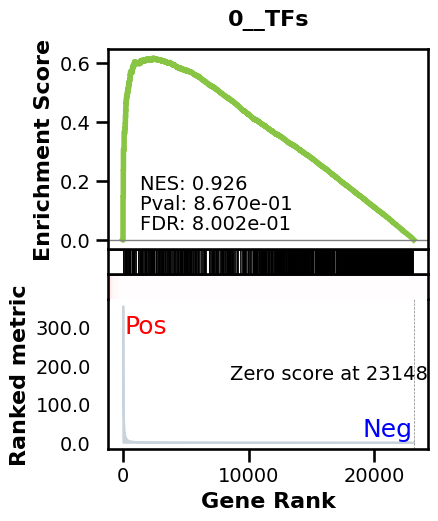

_________________________________________
TF specific enrichment


found some significant results for  62.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].max(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=400, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].max(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [ ]:
metrics

In [ ]:
import pandas as pd

In [ ]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df